In [1]:
#Dependencies
import json
import requests
import numpy as np
import pandas as pd
from youtube_api import API_Key
import itertools
import datetime as dt
import time
# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
#List of channels that needs to query channel information
teams_Youtube_Channels=["fnaticTV","G2 Esports", "Splyce", "Team Vitality", "ROCCAT",
                       "Misfits Gaming", "H2K", "FC Schalke 04 Esports", "Giants Gaming","Unicorns Of Love",
                       "100 Thieves", "Clutch Gaming", "FlyQuest Sports", "Cloud9", "Echo Fox",
                       "Team Liquid", "Golden Guardians", "TSM", "OpTic Gaming", "Counter Logic Gaming"]

## 1st - Run Youtube API to query Channel ID's for Team Channel

In [3]:
#Parameters to narrow down the youtube's channel search
parameters = {"part": 'snippet',
              "type": "channel",
              "fields": 'items(id(channelId),snippet(publishedAt, channelId,description,channelTitle))',
              "maxResults": 1,
              "key": API_Key
             }

In [4]:
#Create an empy list that will be used to store information on the for-loop
channel_ID = []
channel_Title = []
about = []
published = []

In [5]:
url_channel = 'https://www.googleapis.com/youtube/v3/search'

In [6]:
#For-Loop to go through all the team's official youtube channels
for team_channel in teams_Youtube_Channels:
    
    parameters["q"] = team_channel
    #Contruct the finalized url with its parameters and create a request
    #Parse the queried data to json
    info = requests.get(url_channel, params=parameters).json()
    
    #Append the queried data to the initialize list before the for-loop
    channel_ID.append(info['items'][0]['id']['channelId'])
    channel_Title.append(info['items'][0]['snippet']['channelTitle'])
    about.append(info['items'][0]['snippet']['description'])
    published.append(info['items'][0]['snippet']['publishedAt'])
    

In [7]:
#Channel Information
channels = pd.DataFrame({
                    "Team": channel_Title,
                    "About": about,
                    "Date Created": published,
                    "Channel ID": channel_ID}
                    )
channels

,About,Channel ID,Date Created,Team
0,Fnatic is a leading eSports organisation compe...,UCxo56gzJQ_fhb6svPqTSewg,2007-09-01T23:18:11.000Z,fnaticTV
1,G2 Esports is a World Premier eSports Club fou...,UCs9Bi1j5s25Yinhmd-NJvJw,2014-01-20T18:41:30.000Z,G2 Esports
2,"Splyce, founded in 2015, is home to top level ...",UC30f1UTFNXfcGcrsojwOpSw,2015-12-19T17:12:43.000Z,Splyce
3,,UCgjhed4ZWlmC25hS4Sgs7gw,2015-12-09T13:36:53.000Z,Team Vitality
4,"WE ARE ROCCAT, YOU ARE ROCCAT We are gamers, l...",UCJYOx0a2eU_lKmYAOX7Cxxw,2009-06-26T07:31:53.000Z,ROCCAT
5,Official YouTube of the premium esports organi...,UCNlfMcV8ettCBDXP3MQMM6Q,2016-11-23T12:04:14.000Z,Misfits Gaming
6,,UCPeD5OWc42p-Rhq7_HKQ4WA,2016-05-16T10:29:09.000Z,H2K
7,Find behind the scene insights of our boot cam...,UCW5NJHURAfjEywb_2SOlrbA,2016-10-24T09:50:41.000Z,FC Schalke 04 Esports
8,"Welcome to the official channel of the Giants,...",UCgwqIJ1iCyIe49CPUe6iqfQ,2010-06-05T21:44:04.000Z,Giants Gaming
9,The Official YouTube Channel of European LCS T...,UCKe45PmvzzQTmh5-d1kJ-qg,2014-03-20T18:08:48.000Z,Unicorns of Love


In [8]:
#Rename the team names 

channels=channels.replace("FlyQuest Sports","FlyQuest")
channels=channels.replace("fnaticTV","Fnatic")
channels=channels.replace("Giants Gaming","Giants")
channels=channels.replace("Team Vitality","Vitality")
channels

,About,Channel ID,Date Created,Team
0,Fnatic is a leading eSports organisation compe...,UCxo56gzJQ_fhb6svPqTSewg,2007-09-01T23:18:11.000Z,Fnatic
1,G2 Esports is a World Premier eSports Club fou...,UCs9Bi1j5s25Yinhmd-NJvJw,2014-01-20T18:41:30.000Z,G2 Esports
2,"Splyce, founded in 2015, is home to top level ...",UC30f1UTFNXfcGcrsojwOpSw,2015-12-19T17:12:43.000Z,Splyce
3,,UCgjhed4ZWlmC25hS4Sgs7gw,2015-12-09T13:36:53.000Z,Vitality
4,"WE ARE ROCCAT, YOU ARE ROCCAT We are gamers, l...",UCJYOx0a2eU_lKmYAOX7Cxxw,2009-06-26T07:31:53.000Z,ROCCAT
5,Official YouTube of the premium esports organi...,UCNlfMcV8ettCBDXP3MQMM6Q,2016-11-23T12:04:14.000Z,Misfits Gaming
6,,UCPeD5OWc42p-Rhq7_HKQ4WA,2016-05-16T10:29:09.000Z,H2K
7,Find behind the scene insights of our boot cam...,UCW5NJHURAfjEywb_2SOlrbA,2016-10-24T09:50:41.000Z,FC Schalke 04 Esports
8,"Welcome to the official channel of the Giants,...",UCgwqIJ1iCyIe49CPUe6iqfQ,2010-06-05T21:44:04.000Z,Giants
9,The Official YouTube Channel of European LCS T...,UCKe45PmvzzQTmh5-d1kJ-qg,2014-03-20T18:08:48.000Z,Unicorns of Love


## Create a KV pair 2 more API queries

In [9]:
#Create a KV-pair
channel_KV = dict(zip(channels["Channel ID"], channels["Team"]))

In [10]:
#Request Youtube API to create Channel statistics response

## 2nd - API query toget Channel Statistics

In [11]:
#Parameters to narrow down the youtube's channel search
parameters = {"part": 'statistics',
              "fields":'items(statistics )',
              "maxResults": 1,
              "key": API_Key
             }

In [12]:
channelStat_url = 'https://www.googleapis.com/youtube/v3/channels'

In [13]:
count_channel_statistics = []
#For-Loop to go through all the team's official youtube channels
for k, v in channel_KV.items():
    parameters["id"] = k
    #Contruct the finalize url with its parameters and create a request
    #Parse the queried data to json
    stat = requests.get(channelStat_url, params=parameters).json()
    
    count_channel_statistics.append({"Team": v,
                                     "View Count": stat['items'][0]['statistics']['viewCount'],
                                     "Subscriber Count": stat['items'][0]['statistics']['subscriberCount'],
                                     "Video Count": stat['items'][0]['statistics']['videoCount']})

In [14]:
team_statistics_df = pd.DataFrame.from_dict(count_channel_statistics)
team_statistics_df

,Subscriber Count,Team,Video Count,View Count
0,323090,Fnatic,1467,35224636
1,88967,G2 Esports,283,7010398
2,11009,Splyce,299,533933
3,52134,Vitality,56,2391022
4,177209,ROCCAT,430,12224808
5,9952,Misfits Gaming,54,851241
6,21091,H2K,196,2768138
7,3617,FC Schalke 04 Esports,17,217366
8,22127,Giants,313,1334178
9,20310,Unicorns of Love,106,1518288


In [15]:
team_statistics_df.to_csv('Resources/team_statistics_df.csv')

In [16]:
data = pd.merge(channels, team_statistics_df)
data

,About,Channel ID,Date Created,Team,Subscriber Count,Video Count,View Count
0,Fnatic is a leading eSports organisation compe...,UCxo56gzJQ_fhb6svPqTSewg,2007-09-01T23:18:11.000Z,Fnatic,323090,1467,35224636
1,G2 Esports is a World Premier eSports Club fou...,UCs9Bi1j5s25Yinhmd-NJvJw,2014-01-20T18:41:30.000Z,G2 Esports,88967,283,7010398
2,"Splyce, founded in 2015, is home to top level ...",UC30f1UTFNXfcGcrsojwOpSw,2015-12-19T17:12:43.000Z,Splyce,11009,299,533933
3,,UCgjhed4ZWlmC25hS4Sgs7gw,2015-12-09T13:36:53.000Z,Vitality,52134,56,2391022
4,"WE ARE ROCCAT, YOU ARE ROCCAT We are gamers, l...",UCJYOx0a2eU_lKmYAOX7Cxxw,2009-06-26T07:31:53.000Z,ROCCAT,177209,430,12224808
5,Official YouTube of the premium esports organi...,UCNlfMcV8ettCBDXP3MQMM6Q,2016-11-23T12:04:14.000Z,Misfits Gaming,9952,54,851241
6,,UCPeD5OWc42p-Rhq7_HKQ4WA,2016-05-16T10:29:09.000Z,H2K,21091,196,2768138
7,Find behind the scene insights of our boot cam...,UCW5NJHURAfjEywb_2SOlrbA,2016-10-24T09:50:41.000Z,FC Schalke 04 Esports,3617,17,217366
8,"Welcome to the official channel of the Giants,...",UCgwqIJ1iCyIe49CPUe6iqfQ,2010-06-05T21:44:04.000Z,Giants,22127,313,1334178
9,The Official YouTube Channel of European LCS T...,UCKe45PmvzzQTmh5-d1kJ-qg,2014-03-20T18:08:48.000Z,Unicorns of Love,20310,106,1518288


In [17]:
#Save the responses to Resources folder
with open('Resources/Team_channel_stats.json', 'w') as outfile:
    json.dump(count_channel_statistics, outfile)

## 3rd - API query to get Channel and Video comments and replies

In [18]:
#Request Youtube API to get comments and replies

In [19]:
#Parameters to narrow down the youtube's channel search
parameters = {"part": 'snippet,replies',
              "fields": 'nextPageToken,pageInfo(totalResults),items(snippet(channelId,videoId,topLevelComment))',
              "maxResults": 100,
              "key": API_Key
             }

In [20]:
channelComment_url = 'https://www.googleapis.com/youtube/v3/commentThreads'

In [21]:
sentiments = []


for k, v in channel_KV.items():
    parameters["allThreadsRelatedToChannelId"] = k
    comments = requests.get(channelComment_url, params=parameters).json()
    
    counter = 1
    
    for x in range (comments['pageInfo']['totalResults']):
        comment = comments['items'][x]['snippet']['topLevelComment']['snippet']['textDisplay']
        published = comments['items'][x]['snippet']['topLevelComment']['snippet']['publishedAt']

        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(comment)["compound"]
        pos = analyzer.polarity_scores(comment)["pos"]
        neu = analyzer.polarity_scores(comment)["neu"]
        neg = analyzer.polarity_scores(comment)["neg"]

        # Add sentiments for each tweet into an array
        sentiments.append({"Team": v,
                           "Comments":comment,
                           "Published": published,
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Comment Count": counter})
        # Add to counter 
        counter += 1

In [22]:
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df

,Comment Count,Comments,Compound,Negative,Neutral,Positive,Published,Team
0,1,Keep doing what you&#39;re doing! lets go Fnatic!,0.0000,1.000,0.000,0.000,2018-04-03T19:42:33.000Z,Fnatic
1,2,This is going to be the first exciting final s...,0.5411,0.788,0.000,0.212,2018-04-03T19:15:50.000Z,Fnatic
2,3,"Oh Baby! The Legends FNC are BACK! lets go.,<b...",0.7482,0.823,0.000,0.177,2018-04-03T18:18:56.000Z,Fnatic
3,4,"<a href=""http://www.youtube.com/results?search...",0.0000,1.000,0.000,0.000,2018-04-03T17:41:27.000Z,Fnatic
4,5,What does the tatoo on rekkles/martins left ar...,0.0000,1.000,0.000,0.000,2018-04-03T17:32:51.000Z,Fnatic
5,6,"GO FNC, eu new champs!",0.4753,0.564,0.000,0.436,2018-04-03T16:17:46.000Z,Fnatic
6,7,"Oh yeah! FNC IS BACK, BABY!!!!",0.5216,0.598,0.000,0.402,2018-04-03T16:16:06.000Z,Fnatic
7,8,Troupax played a really bad series imo. That g...,-0.3384,0.677,0.198,0.125,2018-04-03T15:33:26.000Z,Fnatic
8,9,"<a href=""http://www.youtube.com/results?search...",0.0000,1.000,0.000,0.000,2018-04-03T14:59:20.000Z,Fnatic
9,10,Omggg shots fired by caps there,-0.5574,0.581,0.419,0.000,2018-04-03T14:03:48.000Z,Fnatic


In [23]:
sentiments_df.to_csv('Resources/comments.csv')

In [24]:
sentiments_df_summary =sentiments_df.groupby(["Team"]).mean()["Compound"]
sentiments_df_summary =pd.DataFrame(sentiments_df_summary)
sentiments_df_summary.reset_index(level=0,inplace=True)
sentiments_df_summary

,Team,Compound
0,100 Thieves,0.245980
1,Cloud9,0.056602
2,Clutch Gaming,0.311709
3,Counter Logic Gaming,0.134759
4,Echo Fox,0.130221
5,FC Schalke 04 Esports,0.193417
6,FlyQuest,0.281289
7,Fnatic,0.224282
8,G2 Esports,0.131121
9,Giants,0.001625


In [25]:
sentiments_df_summary.to_csv('Resources/sentiments_df_summary.csv')

In [26]:
## Merge two data  
Youtube_Data = pd.merge(data,sentiments_df_summary)
#team_sentiment_df=team_sentiment_df.set_index("Team")
Youtube_Data.set_index("Team")

,About,Channel ID,Date Created,Subscriber Count,Video Count,View Count,Compound
Team,,,,,,,
Fnatic,Fnatic is a leading eSports organisation compe...,UCxo56gzJQ_fhb6svPqTSewg,2007-09-01T23:18:11.000Z,323090,1467,35224636,0.224282
G2 Esports,G2 Esports is a World Premier eSports Club fou...,UCs9Bi1j5s25Yinhmd-NJvJw,2014-01-20T18:41:30.000Z,88967,283,7010398,0.131121
Splyce,"Splyce, founded in 2015, is home to top level ...",UC30f1UTFNXfcGcrsojwOpSw,2015-12-19T17:12:43.000Z,11009,299,533933,0.317266
Vitality,,UCgjhed4ZWlmC25hS4Sgs7gw,2015-12-09T13:36:53.000Z,52134,56,2391022,0.018994
ROCCAT,"WE ARE ROCCAT, YOU ARE ROCCAT We are gamers, l...",UCJYOx0a2eU_lKmYAOX7Cxxw,2009-06-26T07:31:53.000Z,177209,430,12224808,0.106700
Misfits Gaming,Official YouTube of the premium esports organi...,UCNlfMcV8ettCBDXP3MQMM6Q,2016-11-23T12:04:14.000Z,9952,54,851241,0.443267
H2K,,UCPeD5OWc42p-Rhq7_HKQ4WA,2016-05-16T10:29:09.000Z,21091,196,2768138,0.135257
FC Schalke 04 Esports,Find behind the scene insights of our boot cam...,UCW5NJHURAfjEywb_2SOlrbA,2016-10-24T09:50:41.000Z,3617,17,217366,0.193417
Giants,"Welcome to the official channel of the Giants,...",UCgwqIJ1iCyIe49CPUe6iqfQ,2010-06-05T21:44:04.000Z,22127,313,1334178,0.001625


In [27]:
Youtube_Data.to_csv('Resources/complete_youtube.csv')

### Make plots

In [28]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

### BarPlot Youtube Comment Sentiment

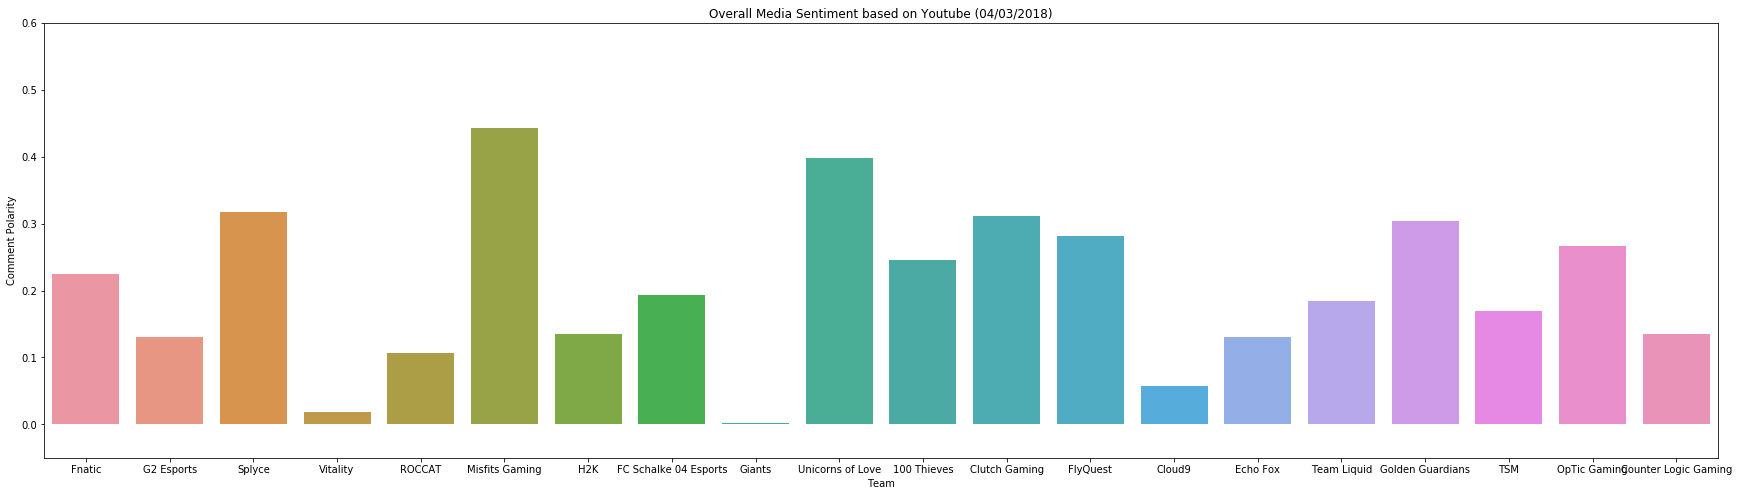

In [44]:
plt.figure(figsize=(30,8))
plt.ylim(-0.05,0.6)
ax = sns.barplot(x = Youtube_Data['Team'], 
                 y = Youtube_Data['Compound'],
                 data=Youtube_Data,
                )

plt.title(f"Overall Media Sentiment based on Youtube ({time.strftime('%m/%d/%Y')})")
plt.ylabel('Comment Polarity')
plt.savefig("Resources/Overall_Media_Sentiment.png")
plt.show()

### ScatterPlot Youtube Comment Sentiment

In [70]:
# Reset default params
sns.set()

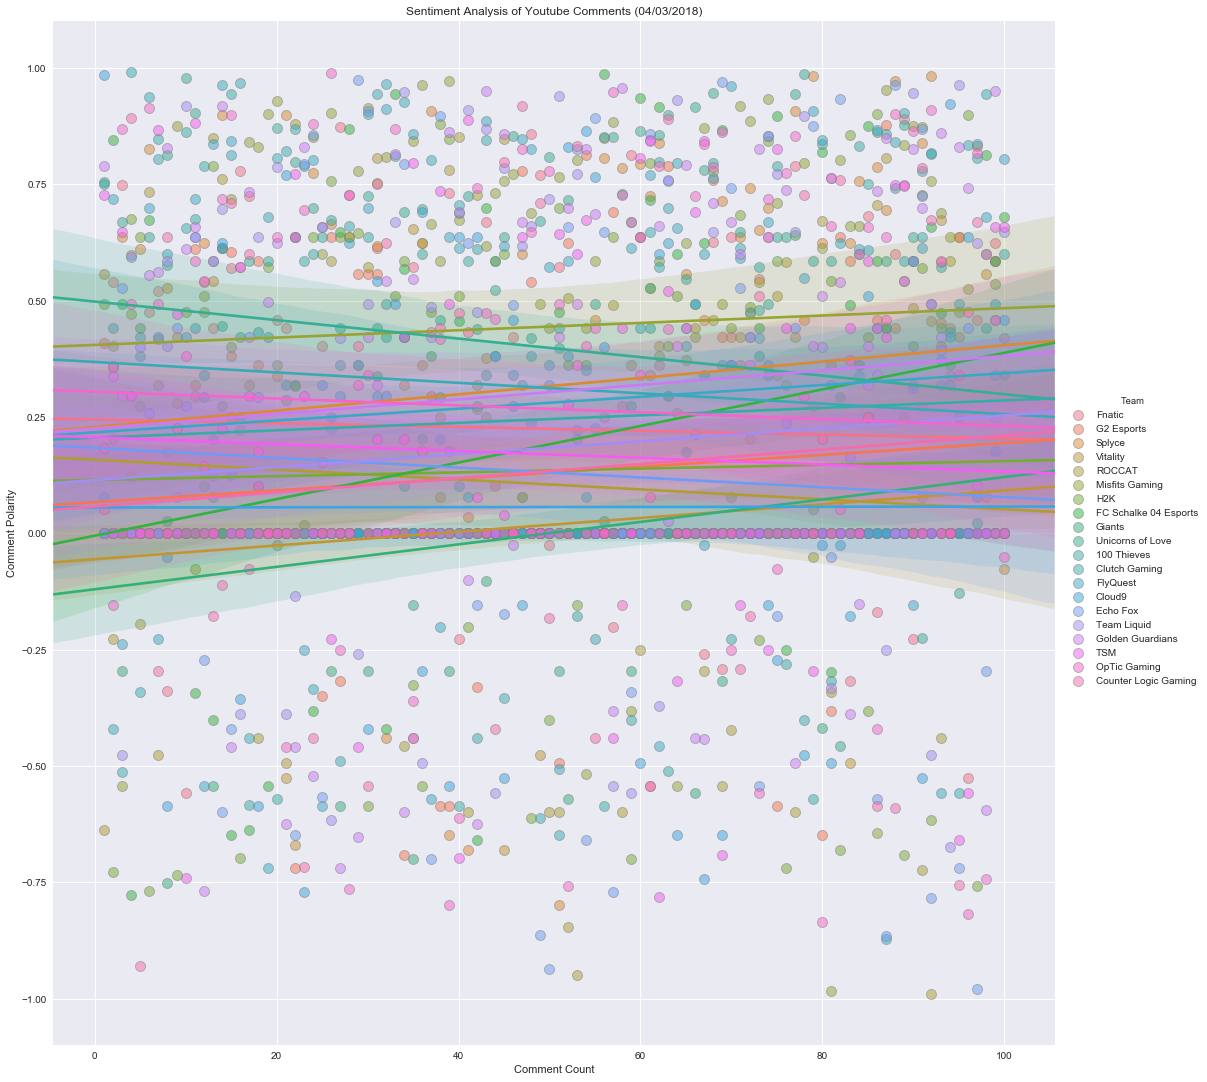

In [75]:
g = sns.lmplot(x='Comment Count', 
           y='Compound', 
           data=sentiments_df,
           fit_reg=True,
           size = 15,
           legend_out=True,
           hue='Team',
           #palette = color_palette,
           scatter_kws={"s":100,"alpha":0.5,"linewidth":1,"edgecolors":'grey'})

plt.title(f"Sentiment Analysis of Youtube Comments ({time.strftime('%m/%d/%Y')})")
plt.ylabel('Comment Polarity')
plt.savefig("Resources/Youtube_comment_sentiment_analysis.png")
plt.show()